## Set up an account
#### 03.1 Winter School on Smart Contracts
##### Peter Gruber (peter.gruber@usi.ch)
2021-11-28

* Create accounts

### Install Algorand sdk
Use menu **Kernel/Restart Kernel** afterwards

In [1]:
# Run this only once, then comment out
!pip install py-algorand-sdk

In [2]:
# What to do if this does not work
#!pip install --upgrade pip
#!pip install --upgrade pip setuptools wheel

### Create a key pair and menemonic locally
These commands create a random private key and provide the according public key and the mnemonic.<br>
The keys only exist on your computer. We do not (yet) interact with the blockchain.

In [3]:
from algosdk import account, mnemonic

#### Random account generation
Function `account.generate_account()` produces a pair of public and private keys

In [4]:
account.generate_account()

('/iXZFBmsUa3liprxTpy34xP3Hhvy7oVfP5OIeQl9Fqg9tVksw/bUG9F/eClptEfgR0BNaqqX2ir1vW0tTHoIbw==',
 'HW2VSLGD63KBXUL7PAUWTNCH4BDUATLKVKL5UKXVXVWS2TD2BBXWBYPAKA')

**EXERCISE:** Run the above cell several times

#### Step 1: Create new private key
Add index `[0]` to obtain only the private key

In [5]:
private_key=account.generate_account()[0]             # Why the [0]? Because generate_account() returns a list!
print(private_key)

I6fxEZVpOYOEArj/1TYU6UkuJ3b1l2liWXD1IWxuCvTVoxY2hvprXTQ/oeTVXSl0ysuAjrRTsbXWoLYcq2D04g==


#### Step 2: Private key $\leftrightarrow$ mnemonic

In [6]:
passphrase = mnemonic.from_private_key(private_key)
print(passphrase)

tongue shoot material off index camp before retreat say swap meat ozone frame mean produce obey essay grain return butter success oppose park abstract virtual


In [7]:
# Quick check: do we get back from the menmonic to the private key?
private_key = mnemonic.to_private_key(passphrase)               
print(private_key)                                         # Yes!! Same as above!

I6fxEZVpOYOEArj/1TYU6UkuJ3b1l2liWXD1IWxuCvTVoxY2hvprXTQ/oeTVXSl0ysuAjrRTsbXWoLYcq2D04g==


#### Step 3: private key $\rightarrow$ public addres
Alternatively menomic $\rightarrow$ public address

In [8]:
public_address = account.address_from_private_key(private_key)
print(public_address)

2WRRMNUG7JVV2NB7UHSNKXJJOTFMXAEOWRJ3DNOWUC3BZK3A6TRMTEYFNM


In [9]:
mnemonic.to_public_key(passphrase)                # same

'2WRRMNUG7JVV2NB7UHSNKXJJOTFMXAEOWRJ3DNOWUC3BZK3A6TRMTEYFNM'

#### Step 4
There is no step 4! We can not obtain the mnemonic or the private key from the public key

### Account dictionaries
* Highly useful way to organize account data

In [10]:
Alice = {}      # Empty dictionary
Alice['public'] = public_address
Alice['private'] = private_key
Alice['passpharse'] = passphrase
Alice 

{'public': '2WRRMNUG7JVV2NB7UHSNKXJJOTFMXAEOWRJ3DNOWUC3BZK3A6TRMTEYFNM',
 'private': 'I6fxEZVpOYOEArj/1TYU6UkuJ3b1l2liWXD1IWxuCvTVoxY2hvprXTQ/oeTVXSl0ysuAjrRTsbXWoLYcq2D04g==',
 'passpharse': 'tongue shoot material off index camp before retreat say swap meat ozone frame mean produce obey essay grain return butter success oppose park abstract virtual'}

### Function for account creation
Useful for automatization

In [11]:
def generate_account_dict():
    from algosdk import account, mnemonic
    private_key = account.generate_account()[0]    # need [0], because generate_account() returns a list
    acc = {}
    acc['public'] = account.address_from_private_key(private_key)
    acc['private'] = private_key
    acc['mnemonic'] = mnemonic.from_private_key(private_key)
    return acc

In [12]:
Bob = generate_account_dict()
Bob

{'public': 'ASDDLWZQF5REAEV267SS65IGKVP7LZLE7CEWXU3CEP66CHF4KFUMHS5JDE',
 'private': 'JbXUpH+F9WivdT0T4mgNwzP/auEn65HHfSC03L0g8VMEhjXbMC9iQBK69+UvdQZVX/XlZPiJa9NiI/3hHLxRaA==',
 'mnemonic': 'pigeon fan sponsor fitness twelve surface pulp dice draw phone mammal destroy wrist follow disease twenty vendor warfare awake slender knife else panel able swear'}

## QR codes

In [13]:
# Installing the qrcode package. Run this once, then comment out
!pip install qrcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40401 sha256=847ee59412fcf7c477b9e0cacee6f3e622bf738d6dc32317da43eb64f266f2a8
  Stored in directory: /Users/pgruber/Library/Caches/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built qrcode


#### Quick introduction to QR codes

In [5]:
import qrcode, urllib

In [15]:
qr = qrcode.QRCode()                         # create empty QR code
qr.add_data('https://www.usi.ch/wsc')        # add data
qr.make(fit=True)                            # create code
img = qr.make_image(fill_color="black", back_color="white")

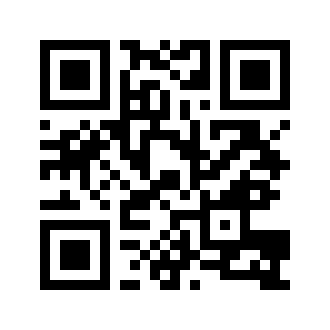

In [16]:
# Try it
img

## Payment QR code
* Need to create a specific URL for the payment
* For details, see https://developer.algorand.org/docs/get-details/transactions/payment_prompts/

In [17]:
amount = 1.2                                                # in algos, will be multiplied by 1million below
amount_microalgo = str(int(amount*1e6))                     # in millialgos, must be integer
note_encoded   =  urllib.parse.quote('Thanks for the coffee')       # encode spaces etc

recipient = Alice['public']

# Specific URL structure
url = 'algorand://' + recipient + '?amount=' + amount_microalgo + '&note=' + note_encoded
print(url)

algorand://2WRRMNUG7JVV2NB7UHSNKXJJOTFMXAEOWRJ3DNOWUC3BZK3A6TRMTEYFNM?amount=1200000&note=Thanks%20for%20the%20coffee


Now create a QR code for Alice

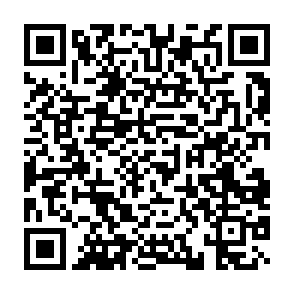

In [18]:
qr = qrcode.QRCode(box_size=6)                    # box_size=6 makes the QR code smaller
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image()
img

### Three ways to scan the QR code
- Scan with iPhone / Android Camera app $\rightarrow$ will open Algorand wallet app
- Scan with general QR scanner in Algorand wallet (top) $\rightarrow$ have to choose which account, which coin
- Start a payment manually and then scan address 

## QR code for installing an account

algorand://{"mnemonic": "hungry clay license reason jaguar ivory eyebrow relief aware unique fringe space year rail toast card math drop tuition limb little coconut fatigue absent stock"}


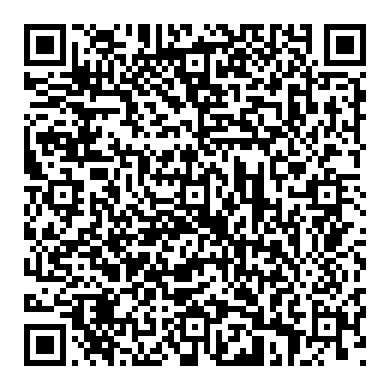

In [9]:
private_key=account.generate_account()[0]             # Why the [0]? Because generate_account() returns a list!
passphrase = mnemonic.from_private_key(private_key)
url = 'algorand://'+'{"mnemonic": "'+passphrase+'"}'
print(url)

qr = qrcode.QRCode(box_size=6)                    # box_size=6 makes the QR code smaller
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image()
img


# Things that can and will go wrong
* If you loose private key and mnemonic, the money is gone
* Just because it is a QR code does not mean it is trustworthy

# Appendix: Playing with QR codes
* Documentation: https://pypi.org/project/qrcode/
* Error correction levels:
    * ERROR_CORRECT_L (can correct 7%)
    * ERROR_CORRECT_M (15%)
    * ERROR_CORRECT_Q (25%)
    * ERROR_CORRECT_H (30%) <-- most robust code
* Colors are CSS colors https://www.w3schools.com/cssref/css_colors.asp

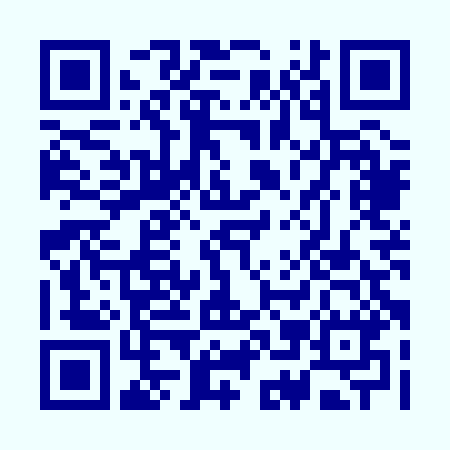

In [19]:
qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_L, 
                   box_size=10,
                   border=4)
qr.add_data(url)
qr.make(fit=True)
img = qr.make_image(fill_color="darkblue", back_color="azure")
img

**EXERCISE** Create a QR code with white color on a black background and test it with your mobile phone.

# Appendix: can you choose your Algorand Address?
* Not really, the address is the Hash of the private key
* **BUT**: we try realy many private keys until we find a match

#### Trying to obtain an Address that starts with your initials
* Let us try to find an account for *Alice*, that starts with `AL`

In [22]:
initials = "AL"
acc = generate_account_dict()
while (not acc['public'].startswith(initials)):
    acc = generate_account_dict()


In [23]:
acc

{'public': 'ALXARUAN7524HFHRQTSB66XK23GZKUAOITMDPV4N2AGLKM5MWFPKX6AFHA',
 'private': 'PG/JFH+sM0CkS41YF8YJzCKrh7xD2IupejPLAx9e0kQC7gjQDf91w5TxhOQfeurWzZVQDkTYN9eN0Ay1M6yxXg==',
 'mnemonic': 'travel certain media side guard avoid frog minute twelve blue agent coast film capable bulb success cousin turkey often device dignity nurse charge able chapter'}

#### Exercise
* Create an account with your initials
* Try to add one by one letter to the initials
* Discuss the claims about safety on this page: https://algovanity.com